<a href="https://colab.research.google.com/github/mahdiheidari721/DeepLearning/blob/HW1/DL_HW1_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A

In [ ]:
import pandas as pd
df = pd.read_csv("Heart_Disease_Dataset.csv")

In [ ]:
print("Dataset Size: Rows =", df.shape[0], ", Columns =", df.shape[1])

Dataset Size: Rows = 1190 , Columns = 12


In [ ]:
missing_values = df.isna().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [ ]:
class_counts = df["target"].value_counts()
print("Class Distribution:")
print(class_counts)


Class Distribution:
1    629
0    561
Name: target, dtype: int64


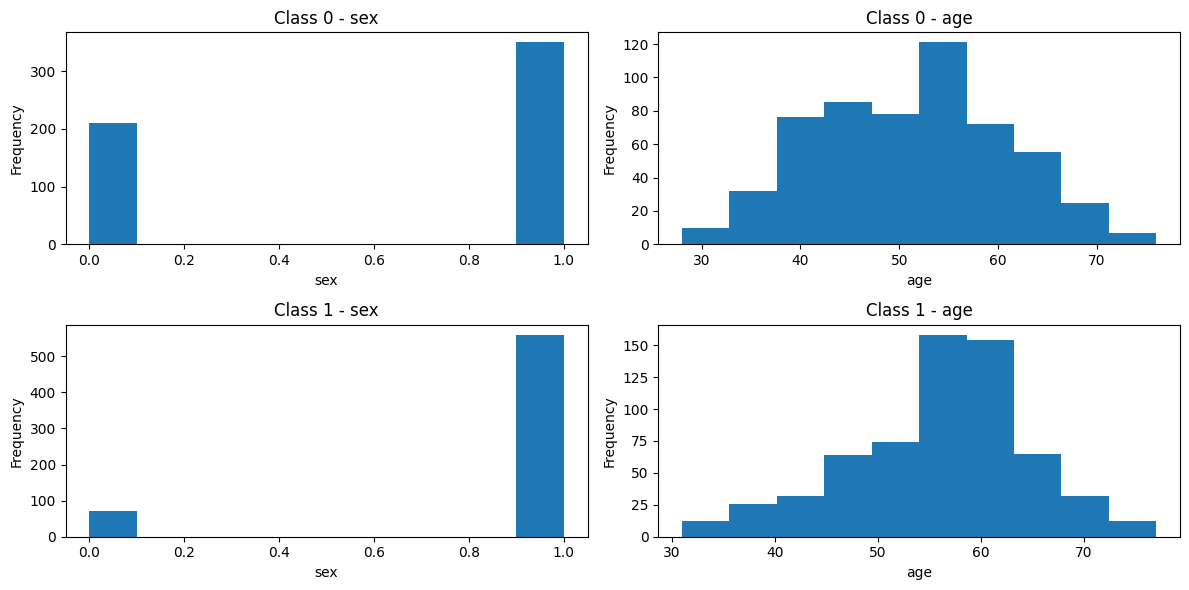

In [ ]:
import matplotlib.pyplot as plt

class_column = "target"
column_to_plot1 = "sex"
column_to_plot2 = "age"
unique_classes = df[class_column].unique()
plt.figure(figsize=(12, 6))
num_classes = len(unique_classes)

for i, class_label in enumerate(unique_classes, 1):
    class_data = df[df[class_column] == class_label]
    plt.subplot(num_classes, 2, 2 * i - 1)
    plt.hist(class_data[column_to_plot1], bins=10)
    plt.xlabel(column_to_plot1)
    plt.ylabel("Frequency")
    plt.title(f"Class {class_label} - {column_to_plot1}")
    plt.subplot(num_classes, 2, 2 * i)
    plt.hist(class_data[column_to_plot2], bins=10)
    plt.xlabel(column_to_plot2)
    plt.ylabel("Frequency")
    plt.title(f"Class {class_label} - {column_to_plot2}")

plt.tight_layout()
plt.show()






B

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
threshold = 3
z_scores = np.abs(stats.zscore(df))
outlier_rows = np.any(z_scores > threshold, axis=1)
outliers = df[outlier_rows]
df_cleaned = df[~outlier_rows]
print("Outliers:")
print(outliers)
print("\nSize of the Final DataFrame:", df_cleaned.shape)


Outliers:
      age  sex  chest pain type  resting bp s  cholesterol  \
30     53    1                3           145          518   
76     32    1                4           118          529   
109    39    1                2           190          241   
149    54    1                4           130          603   
167    50    1                4           140          231   
242    54    1                4           200          198   
325    46    1                4           100            0   
366    64    0                4           200            0   
371    60    1                4           135            0   
391    51    1                4           140            0   
400    61    1                3           200            0   
450    55    1                3             0            0   
593    61    1                4           190          287   
618    67    0                3           115          564   
704    59    1                1           178          270  

C

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ["age", "chest pain type","resting bp s","cholesterol","max heart rate","oldpeak","ST slope"]
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
print(df)


           age  sex  chest pain type  resting bp s  cholesterol  \
0     0.244898    1         0.333333          0.70     0.479270   
1     0.428571    0         0.666667          0.80     0.298507   
2     0.183673    1         0.333333          0.65     0.469320   
3     0.408163    0         1.000000          0.69     0.354892   
4     0.530612    1         0.666667          0.75     0.323383   
...        ...  ...              ...           ...          ...   
1185  0.346939    1         0.000000          0.55     0.437811   
1186  0.816327    1         1.000000          0.72     0.320066   
1187  0.591837    1         1.000000          0.65     0.217247   
1188  0.591837    0         0.333333          0.65     0.391376   
1189  0.204082    1         0.666667          0.69     0.290216   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0        0.788732                0   
1                       0            0       

D

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
classifiers = {
    "RBF Kernel": SVC(kernel='rbf'),
    "Linear Kernel": SVC(kernel='linear'),
    "Polynomial Kernel": SVC(kernel='poly', degree=3)
}
for kernel, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")


Kernel: RBF Kernel
Accuracy: 0.89
Precision: 0.89
Recall: 0.91
F1 Score: 0.90


Kernel: Linear Kernel
Accuracy: 0.86
Precision: 0.88
Recall: 0.88
F1 Score: 0.88


Kernel: Polynomial Kernel
Accuracy: 0.87
Precision: 0.89
Recall: 0.89
F1 Score: 0.89


